# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')


In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
#Printing out dimemsionality
print('Heroes_df has ', str(heroes_df.shape[0]), ' rows and ', str(heroes_df.shape[1]), ' columns.')
print('Powers_df has ', str(powers_df.shape[0]), ' rows and ', str(powers_df.shape[1]), ' columns.')

Heroes_df has  734  rows and  10  columns.
Powers_df has  667  rows and  168  columns.


In [7]:
#Printing out column information
print(heroes_df.info())
print(powers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


In [8]:
#heroes_df summary statistics
print(heroes_df.describe())

           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000


In [9]:
#powers_df summary statistics
print(powers_df.describe())

for column in powers_df.columns:
    print(powers_df[column].value_counts())

       hero_names Agility Accelerated Healing Lantern Power Ring  \
count         667     667                 667                667   
unique        667       2                   2                  2   
top      Firebird   False               False              False   
freq            1     425                 489                656   

       Dimensional Awareness Cold Resistance Durability Stealth  \
count                    667             667        667     667   
unique                     2               2          2       2   
top                    False           False      False   False   
freq                     642             620        410     541   

       Energy Absorption Flight    ...     Web Creation Reality Warping  \
count                667    667    ...              667             667   
unique                 2      2    ...                2               2   
top                False  False    ...            False           False   
freq                 59

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [10]:
#detecting null values in heroes_df
print(heroes_df.isna().sum())

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64


df.isna().sum() shows that publisher column is missing 15 values.  Weight is missing two. So those columns must be dealt with.  

In [11]:
#Investigating heroes_df for placeholder values...
for column in heroes_df.columns:
    print(heroes_df[column].value_counts())

Goliath             3
Spider-Man          3
Angel               2
Atom                2
Batman              2
Blue Beetle         2
Blizzard            2
Firestorm           2
Batgirl             2
Toxin               2
Captain Marvel      2
Speedy              2
Black Canary        2
Atlas               2
Namor               2
Vindicator          2
Nova                2
Man of Miracles     1
Metron              1
Sasquatch           1
Kid Flash           1
Ra's Al Ghul        1
Garbage Man         1
Franklin Storm      1
Stormtrooper        1
Swamp Thing         1
Green Goblin IV     1
Machine Man         1
Ares                1
Michelangelo        1
                   ..
Alex Mercer         1
Wildfire            1
Valerie Hart        1
Krypto              1
Utgard-Loki         1
White Canary        1
Mera                1
Blizzard II         1
T-X                 1
Luna                1
Phoenix             1
Elongated Man       1
Bumblebee           1
Bantam              1
Penance   

.value_counts() show that 29 rows have no specified gender (-), 172 rows have no eye color (-), 304 rows have no race (-), 172 rows have no hair color (-), 217 rows have an unrealistic height (-99.0), 662 rows have no skin color (-), 7 rows have no alignment (-), and 237 rows have an unrealistic weight (-99.0).

We need to deal with null values in Publisher and Weight as well as deal with the placeholder values in Height and Weight. 

Strategy...
1. Replace null publisher values with "Unknown"
2. Replace null weights with placeholder -99.0
3. Replace placeholder values in height and weight with median/mean values.  Investigate value distribution of each first with histogram charts.

In [12]:
#Replacing null publisher values with "Unknown"
heroes_df['Publisher'].fillna('-', inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        2
dtype: int64

In [13]:
#Replacing null weights with placeholder -99.0
heroes_df['Weight'].fillna(-99.0, inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

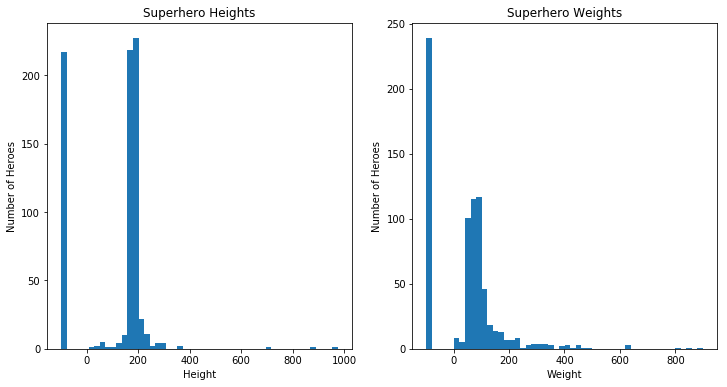

In [14]:
#exploring height and weight histograms to determine whether median or mean is better replacement value

figure = plt.figure(figsize=(12,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)

ax1.hist(list(heroes_df['Height']), bins=50)
ax1.set_xlabel('Height')
ax1.set_ylabel('Number of Heroes')
ax1.set_title('Superhero Heights')

ax2.hist(list(heroes_df['Weight']), bins=50)
ax2.set_xlabel('Weight')
ax2.set_ylabel('Number of Heroes')
ax2.set_title('Superhero Weights')

plt.show()




As the histograms show above, the medians would be a better replacement value as both distribution are skewed right.  I have decided against replacing the placeholder values as in both series, they make up about a third of the entire series.  Replacing the values may introduce too much noise into the original distributions.  

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

I'm going to attempt an inner join.  That way the resultant dataframe is complete as possible.

In [15]:
#Need to set indices of both dataframes to hero names
heroes_df.set_index('name',inplace=True)
powers_df.set_index('hero_names',inplace=True)

In [16]:
#inner join
heroes_with_powers_df = heroes_df.join(powers_df,how='inner')
heroes_with_powers_df


,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [18]:
male_heroes_df = heroes_with_powers_df[heroes_with_powers_df["Gender"] == "Male"]
female_heroes_df = heroes_with_powers_df[heroes_with_powers_df["Gender"] == "Female"]

In [19]:
#Need to remove those points that have placeholders -99.0 in either height or weight
male_heights = list(male_heroes_df["Height"])
female_heights = list(female_heroes_df["Height"])
male_weights = list(male_heroes_df["Weight"])
female_weights = list(female_heroes_df["Weight"])    

In [32]:
good_male_heights = []
good_male_weights = []
good_female_heights = []
good_female_weights = []

for i in range(len(male_heights)):
    if male_heights[i] != -99.0 and male_weights[i] != -99.0:
        good_male_heights.append(male_heights[i])
        good_male_weights.append(male_weights[i])
        
for i in range(len(female_heights)):
    if female_heights[i] != -99.0 and female_weights[i] != -99.0:
        good_female_heights.append(female_heights[i])
        good_female_weights.append(female_weights[i])

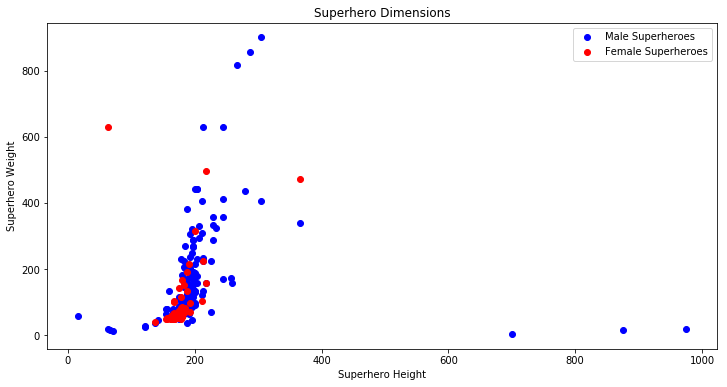

In [43]:
#overlaid scatter plots
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax1.scatter(good_male_heights,good_male_weights,color='b',label="Male Superheroes")
ax1.scatter(good_female_heights,good_female_weights,color='r',label="Female Superheroes")
ax1.set_xlabel("Superhero Height")
ax1.set_ylabel("Superhero Weight")
ax1.set_title("Superhero Dimensions")
plt.legend()
plt.show()


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [46]:
def show_distplot(dataframe, gender, column_name):
    new_dataframe = dataframe[dataframe["Gender"] == gender]
    values = list(new_dataframe[column_name])
    sns.set()
    return sns.distplot(values)

Mean =  193.49906542056073 , Median =  185.0 , StDev =  70.2046161585382


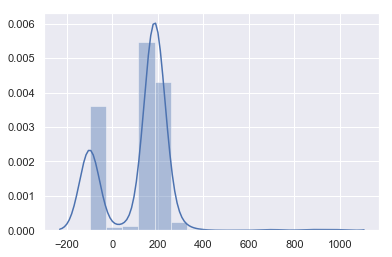

In [55]:
# Male Height
show_distplot(heroes_with_powers_df,'Male','Height');
print('Mean = ',np.mean(good_male_heights),', Median = ',np.median(good_male_heights),', StDev = ',np.std(good_male_heights))


Mean =  126.6822429906542 , Median =  90.0 , StDev =  112.87221000143313


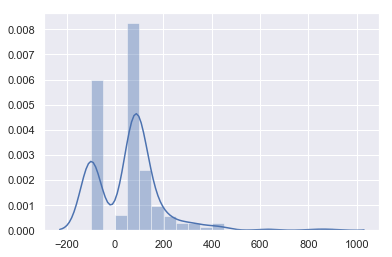

In [56]:
# Male Weight
show_distplot(heroes_with_powers_df,'Male','Weight');
print('Mean = ',np.mean(good_male_weights),', Median = ',np.median(good_male_weights),', StDev = ',np.std(good_male_weights))


Mean =  173.84701492537314 , Median =  170.0 , StDev =  22.03933285246781


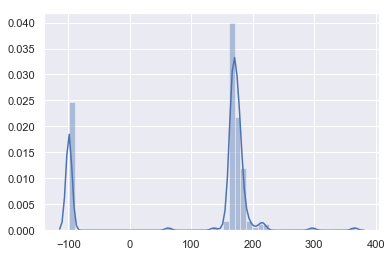

In [57]:
# Female Height
show_distplot(heroes_with_powers_df,'Female','Height');
print('Mean = ',np.mean(good_female_heights),', Median = ',np.median(good_female_heights),', StDev = ',np.std(good_female_heights))


Mean =  79.34328358208955 , Median =  57.5 , StDev =  78.5901046216505


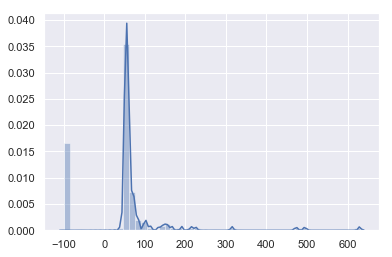

In [58]:
# Female Weight
show_distplot(heroes_with_powers_df,'Female','Weight');
print('Mean = ',np.mean(good_female_weights),', Median = ',np.median(good_female_weights),', StDev = ',np.std(good_female_weights))


Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
___________________________________________________________________________________________________________________________
The superhero height and weight distributions all exhibited right skewness with the height distributions exhibiting a more normal and clustered shape (as the standard deviations showed).  Both weight distributions exhibited a few very high outliers which pulled the mean towards the tail.  Median would be a better measure of the weight distributions' centrality.  This is all discounting the -99.0 placeholders.  

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [110]:
#Most common power overall
#most_common_power_list = []
#most_common_power_count = None

#for column in powers_df.columns:
#    if most_common_power_list == []:
#        most_common_power_list.append(column)
#        most_common_power_count = powers_df[column].value_counts()[True]
#    else:
#        if most_common_power_count < powers_df[column].value_counts()[True]:
#            most_common_power_list = [column]
#            most_common_power_count = powers_df[column].value_counts()[True]
#        elif most_common_power_count == powers_df[column].value_counts()[True]:
#            most_common_power_list.append[column]

#print('The most common power is', str(most_common_power_list)+'.', str(most_common_power_count), 'superheroes have this power.')

#5 most common powers
most_common_powers_dict = {}

for column in powers_df.columns:
    most_common_powers_dict[column] = powers_df[column].value_counts()[True]
    
print("The 5 most common powers are", sorted(most_common_powers_dict,key=most_common_powers_dict.get, reverse=True)[:5])


The 5 most common powers are ['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility']


In [152]:
#5 most common powers in Marvel
marvel_heroes_df = heroes_with_powers_df[heroes_with_powers_df['Publisher'] == 'Marvel Comics']

most_common_powers_marvel_dict = {}

for power in powers_df.columns:
    if True in marvel_heroes_df[power].value_counts().index:
        most_common_powers_marvel_dict[power] = marvel_heroes_df[power].value_counts()[True]
    else:
        most_common_powers_marvel_dict[power] = 0

print("The 5 most common powers in Marvel are", sorted(most_common_powers_marvel_dict,key=most_common_powers_marvel_dict.get, reverse=True)[:5])




The 5 most common powers in Marvel are ['Super Strength', 'Durability', 'Stamina', 'Super Speed', 'Agility']


In [159]:
#5 most common powers in DC
dc_heroes_df = heroes_with_powers_df[heroes_with_powers_df['Publisher'] == 'DC Comics']

most_common_powers_dc_dict = {}

for power in powers_df.columns:
    if True in dc_heroes_df[power].value_counts().index:
        most_common_powers_dc_dict[power] = dc_heroes_df[power].value_counts()[True]
    else:
        most_common_powers_dc_dict[power] = 0

print("The 5 most common powers in DC are", sorted(most_common_powers_dc_dict,key=most_common_powers_dc_dict.get, reverse=True)[:5])


The 5 most common powers in DC are ['Super Strength', 'Stamina', 'Flight', 'Super Speed', 'Agility']


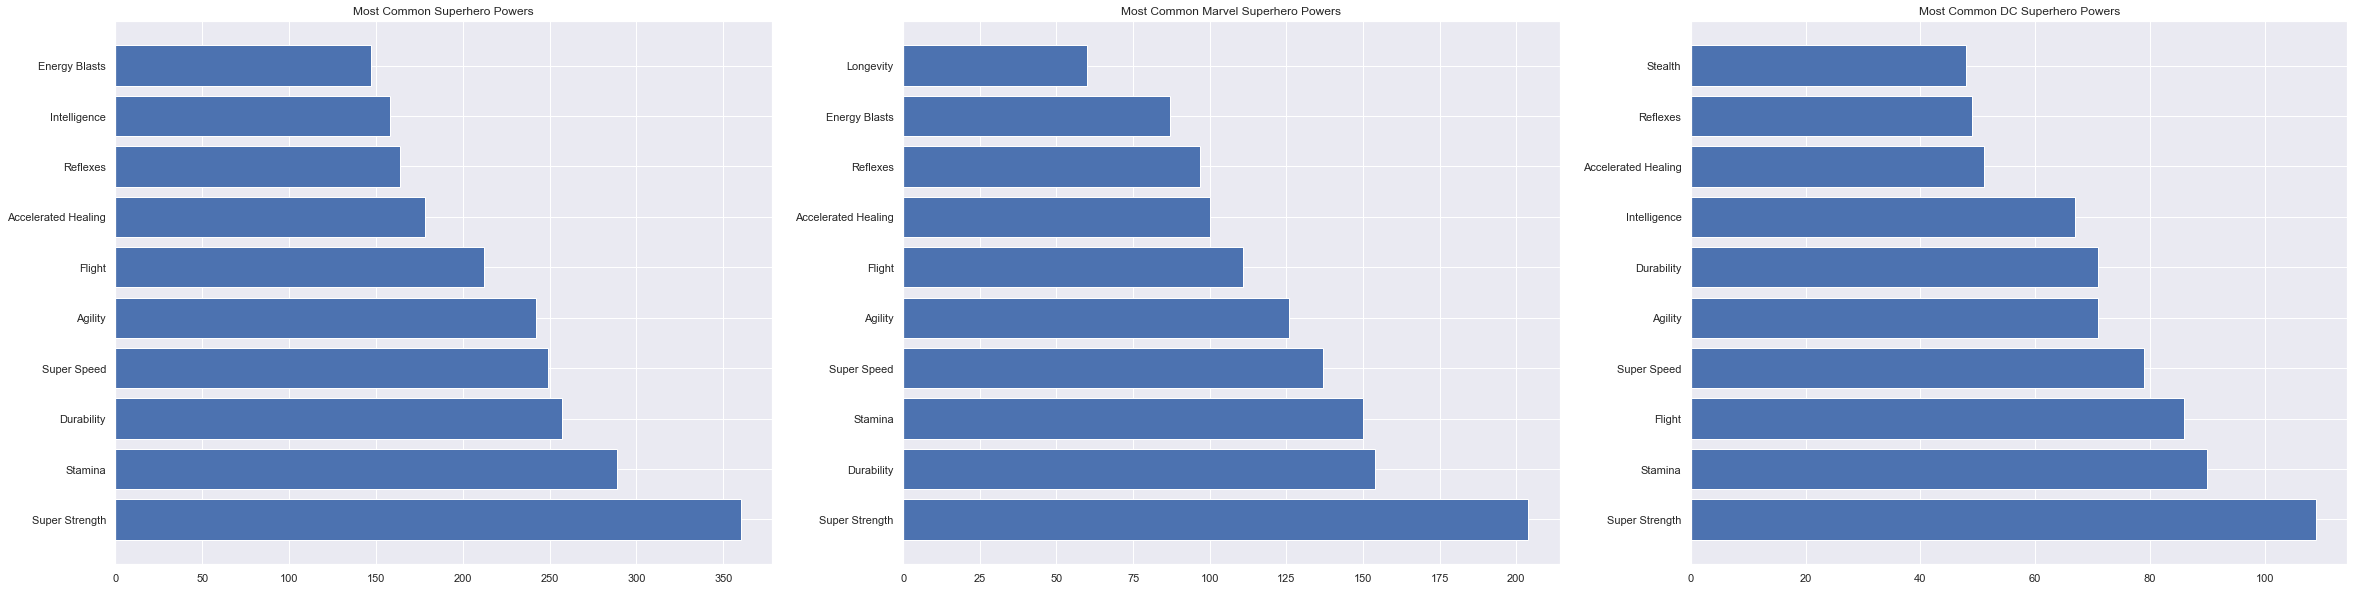

In [193]:
#Plots of top ten powers of each and combined universes
power_plots = plt.figure(figsize=(40,10))

top_ten_combined = sorted(most_common_powers_dict,key=most_common_powers_dict.get, reverse=True)[:10]
top_ten_combined_counts = []
for power in top_ten_combined:
    top_ten_combined_counts.append(most_common_powers_dict[power])
combined_ax = power_plots.add_subplot(131)
combined_ax.barh(top_ten_combined, top_ten_combined_counts)
combined_ax.set_title("Most Common Superhero Powers")

top_ten_marvel = sorted(most_common_powers_marvel_dict,key=most_common_powers_marvel_dict.get, reverse=True)[:10]
top_ten_marvel_counts = []
for power in top_ten_marvel:
    top_ten_marvel_counts.append(most_common_powers_marvel_dict[power])
marvel_ax = power_plots.add_subplot(132)
marvel_ax.barh(top_ten_marvel, top_ten_marvel_counts)
marvel_ax.set_title("Most Common Marvel Superhero Powers")

top_ten_dc = sorted(most_common_powers_dc_dict,key=most_common_powers_dc_dict.get, reverse=True)[:10]
top_ten_dc_counts = []
for power in top_ten_dc:
    top_ten_dc_counts.append(most_common_powers_dc_dict[power])
dc_ax = power_plots.add_subplot(133)
dc_ax.barh(top_ten_dc, top_ten_dc_counts)
dc_ax.set_title("Most Common DC Superhero Powers")


plt.show()


In [195]:
print(top_ten_marvel)

['Super Strength', 'Durability', 'Stamina', 'Super Speed', 'Agility', 'Flight', 'Accelerated Healing', 'Reflexes', 'Energy Blasts', 'Longevity']


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________
The top five Marvel powers are the same top give as the top five combined publisher powers with the only difference being the order.  Durability is less common than stamina in the combined publishers group where its the opposite for Marvel Heroes.  The top five DC powers are very similar to the other two segments but in DC, flight replaces durability as one of the top five. Intelligence seems to be a more common power in the DC universe whereas energy blasts seem to be more common for Marvel.  

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [198]:
heroes_with_powers_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


In [238]:
heroes_with_powers_df.groupby(["Race","Skin color"]).sum()

Height  Weight  Agility  Accelerated Healing  \
Race               Skin color                                                   
-                  -            17638.0  5419.0     32.0                 33.0   
                   green          213.0   225.0      0.0                  0.0   
                   red            -99.0   -99.0      0.0                  0.0   
Alien              -              333.0   401.0      1.0                  1.0   
                   gold           193.0    98.0      1.0                  1.0   
                   green          191.0   106.0      0.0                  1.0   
                   grey           201.0    97.0      0.0                  0.0   
                   silver         193.0   101.0      1.0                  0.0   
Alpha              -             -495.0  -495.0      0.0                  0.0   
Amazon             -              358.0   137.0      0.0                  1.0   
Android            -              539.0   310.0      3.0                  0.0   
                   gray           213.0   -99.0      0.0                  0.0   
                   green          198.0   135.0      0.0                  0.0   
                   red            191.0   135.0      0.0                  0.0   
                   silver         389.0   477.0      2.0                  1.0   
Animal             -               53.5  -173.0      2.0                  0.0   
Asgardian          -              967.0  1083.0      3.0                  4.0   
Atlantean          -              901.0   521.0      2.0                  2.0   
Bizarro            white          191.0   155.0      1.0                  1.0   
Bolovaxian         pink           234.0   324.0      0.0                  1.0   
Clone              -              193.0   113.0      1.0                  1.0   
Cosmic Entity      -              678.0  -182.0      1.0                  2.0   
                   gold           -99.0   -99.0      1.0                  1.0   
Cyborg             -              927.0  1148.0      6.0                  3.0   
                   silver         -99.0   149.0      1.0                  1.0   
Czarnian           blue-white     229.0   288.0      0.0                  0.0   
Dathomirian Zabrak red / black    170.0   -99.0      1.0                  0.0   
Demi-God           -              361.0   197.0      1.0                  1.0   
Demon              -              843.0   757.0      3.0                  2.0   
                   white          191.0   104.0      1.0                  1.0   
...                                 ...     ...      ...                  ...   
Martian            green          201.0   135.0      1.0                  0.0   
Metahuman          -              170.0    59.0      1.0                  0.0   
                   green          244.0   356.0      1.0                  1.0   
Mutant             -             7272.0  3094.0     21.0                 16.0   
                   blue           724.0   370.0      3.0                  3.0   
                   green         -221.0  -320.0      5.0                  5.0   
                   grey           213.0   135.0      1.0                  1.0   
                   pink           165.0    56.0      0.0                  0.0   
                   red            183.0    88.0      0.0                  1.0   
                   yellow         196.0    47.0      0.0                  0.0   
Mutant / Clone     -              155.0    50.0      1.0                  1.0   
New God            -              188.0   135.0      1.0                  0.0   
                   grey           267.0   817.0      1.0                  1.0   
                   white          183.0    91.0      1.0                  1.0   
Neyaphem           red            183.0    67.0      0.0                  1.0   
Parademon          -              -99.0   -99.0      0.0                  0.0   
Rodian             green          170.0   -99.0      0.0        

In [239]:
heroes_with_index_df = heroes_with_powers_df.reset_index()

In [244]:
heroes_with_index_df.head()

,index,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [247]:
heroes_with_index_df.pivot(index="Race",columns="Gender",values='Skin color')

ValueError: Index contains duplicate entries, cannot reshape

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data